In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import imutils
from math import floor

In [2]:
def imshow(img, st='Untitled Image'):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(st)
    plt.show()

In [3]:
def order_points(pts):
	rect = np.zeros((4, 2), dtype = "float32")
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	return rect

In [4]:
def four_point_transform(image, pts):
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	M = cv.getPerspectiveTransform(rect, dst)
	warped = cv.warpPerspective(image, M, (maxWidth, maxHeight))
	return warped

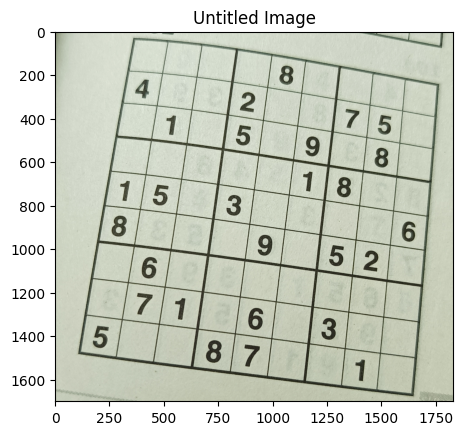

In [14]:
img = cv.imread('sudoku1.jpg')
imshow(img)

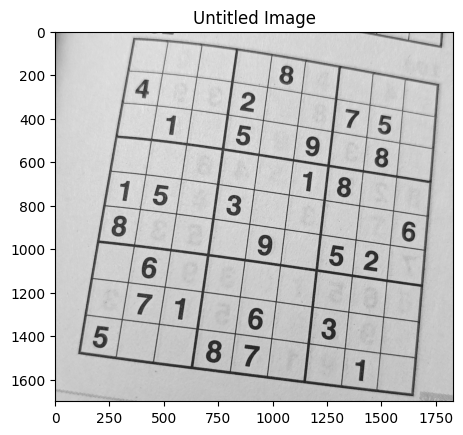

In [15]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imshow(img_gray)

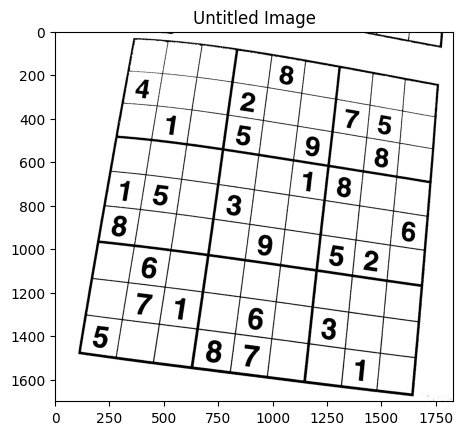

In [16]:
img_clean = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
ret, img_clean = cv.threshold(img_gray, 130, 255, cv.THRESH_BINARY)
imshow(img_clean)

In [17]:
dummy = img.copy()
area = dummy.shape[0]*dummy.shape[1]
cnt, heirarchy = cv.findContours(img_clean, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
puzzle = None
for c in cnt:
    eps = 0.01*cv.arcLength(c, True)
    c = cv.approxPolyDP(c, eps, True)
    # cv.drawContours(dummy, [c], -1, (255, 0, 0), 100, cv.LINE_AA)
    if len(c) == 4 and cv.contourArea(c) < 0.90*area and cv.contourArea(c) > 0.10*area:
        puzzle = c
        print(cv.contourArea(c))
        break
if puzzle is not None:
    dummy = cv.drawContours(dummy, [puzzle], -1, (255, 0, 0), 3, cv.LINE_AA)
else:
    raise Exception('Hello!!!!')

2157251.5


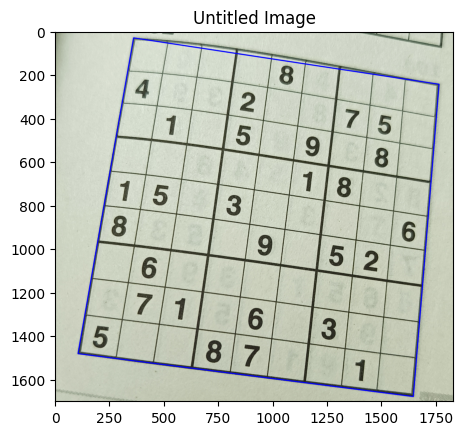

In [18]:
imshow(dummy)

In [19]:
puzz = four_point_transform(img, puzzle.reshape(4, 2))

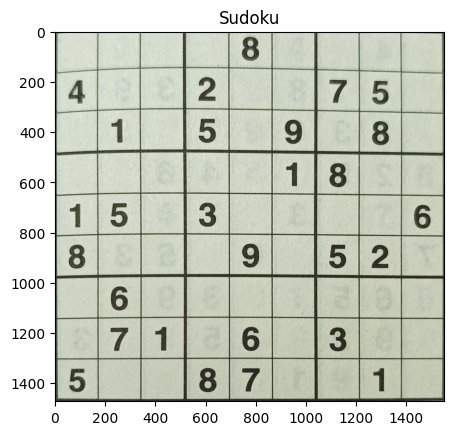

In [20]:
imshow(puzz, 'Sudoku')

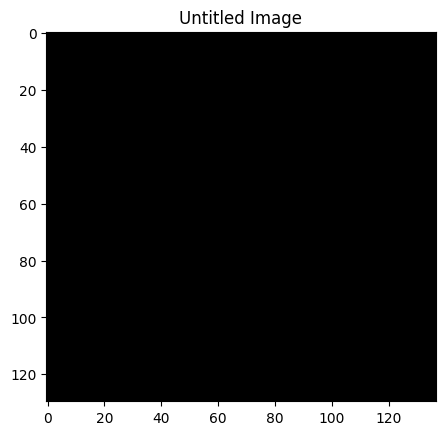

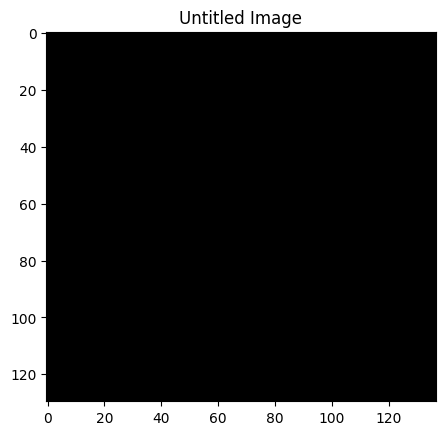

In [21]:
height, width, ch = puzz.shape
height, width = height // 9, width // 9
cell0 = puzz[0:height, 0:width, :]
cell0 = cell0[floor(height*0.1):floor(height*0.9), floor(width*0.1):floor(width*0.9), :]
cell1 = puzz[0:height, width:2*width, :]
cell1 = cell1[floor(height*0.1):floor(height*0.9), floor(width*0.1):floor(width*0.9), :]
cell0 = cv.cvtColor(cell0, cv.COLOR_BGR2GRAY)
cell1 = cv.cvtColor(cell1, cv.COLOR_BGR2GRAY)
ret, cell0 = cv.threshold(cell0, 100, 255, cv.THRESH_BINARY_INV)
ret, cell1 = cv.threshold(cell1, 100, 255, cv.THRESH_BINARY_INV)
imshow(cell0)
imshow(cell1)